In [10]:
import pandas as pd
from pymongo import MongoClient
#by default we connected to localhost and 27017
#connecting to: mongodb://127.0.0.1:27017
#So we connect to localhost and 27017  
client = MongoClient('localhost', 27017) 

In [11]:
db=client['childState']

In [15]:
#create the first collection demographics

demographics=db['demographics']
collection = db.get_collection("demographics")


In [16]:
print(db.list_collection_names())

[]


In [49]:
dfD=pd.read_excel(r'/home/glo36/glgl4thYear/4thSecTerm/BD/FinalProject/Table-1-Demographics-SOWC2021-EN.xlsx',skiprows=3)

In [50]:
print(dfD)

                    Countries and areas   Total Under 18 Under 5  \
0                           Afghanistan   38928    19137    5673   
1                               Albania    2878      611     166   
2                               Algeria   43851    15292    5042   
3                               Andorra      77       13       3   
4                                Angola   32866    17457    5795   
5                              Anguilla      15        4      <1   
6                   Antigua and Barbuda      98       26       7   
7                             Argentina   45196    13176    3737   
8                               Armenia    2963      721     205   
9                             Australia   25500     5833    1670   
10                              Austria    9006     1564     448   
11                           Azerbaijan   10139     2764     825   
12                              Bahamas     393      104      27   
13                              Bahrain    1702 

In [19]:
dataInDemo=dfD.to_dict('records')

In [51]:
demographics.insert_many(dataInDemo)
print(demographics.count_documents({}))

BulkWriteError: batch op errors occurred, full error: {'writeErrors': [{'index': 0, 'code': 11000, 'keyPattern': {'_id': 1}, 'keyValue': {'_id': 1}, 'errmsg': 'E11000 duplicate key error collection: childState.demographics index: _id_ dup key: { _id: 1 }', 'op': {'Countries and areas': 'Afghanistan', 'Total': 38928, 'Under 18': 19137, 'Under 5': 5673, '2000–2020 APG': 2.98920775901368, '2020–2030 APG': 1.92205515758612, 'ANOBs(2020)': 1216, 'TF(LBPW)2020': 4.176, 'LEAB(70s)': 37.409, 'LEAB(20)': 55.841, 'LEAB(20*2)': 65.173, 'TDR(%)': 80.0882594983951, 'CDR(%)': 75.3176000821974, 'OADR(%)': 4.77065941619773, 'SUP%(20*2)': 26.026, 'AGROUP(%) (20):(20*2)': 3.77260966738704, 'AGROUP(%) (20):(2030)': 3.0884790874534, 'NMR(per k)(15:20)': -1.716, '_id': 1}}], 'writeConcernErrors': [], 'nInserted': 0, 'nUpserted': 0, 'nMatched': 0, 'nModified': 0, 'nRemoved': 0, 'upserted': []}

In [52]:
print(db.list_collection_names())

['DisTable', 'demographics']


In [53]:
dfD['Total'] = pd.to_numeric(dfD['Total'], errors='coerce')

In [54]:
filtered_dfD = dfD[dfD['Total'] > 20000]   

In [56]:
print(filtered_dfD )#

                       Countries and areas      Total Under 18 Under 5  \
0                              Afghanistan    38928.0    19137    5673   
2                                  Algeria    43851.0    15292    5042   
4                                   Angola    32866.0    17457    5795   
7                                Argentina    45196.0    13176    3737   
9                                Australia    25500.0     5833    1670   
14                              Bangladesh   164689.0    53407   14328   
24                                  Brazil   212559.0    53597   14475   
28                            Burkina Faso    20903.0    10708    3472   
32                                Cameroon    26546.0    12936    4116   
33                                  Canada    37742.0     7120    1993   
37                                   China  1439324.0   304174   83932   
38                                Colombia    50883.0    13801    3711   
43                           Côte d'Iv

In [57]:
print(filtered_dfD['Countries and areas'])
fil=demographics.find({})

0                                Afghanistan
2                                    Algeria
4                                     Angola
7                                  Argentina
9                                  Australia
14                                Bangladesh
24                                    Brazil
28                              Burkina Faso
32                                  Cameroon
33                                    Canada
37                                     China
38                                  Colombia
43                             Côte d'Ivoire
48     Democratic People's Republic of Korea
49          Democratic Republic of the Congo
55                                     Egypt
61                                  Ethiopia
64                                    France
68                                   Germany
69                                     Ghana
81                                     India
82                                 Indonesia
83        

In [58]:
fil=demographics.find({})

In [59]:
for doc in fil:
    print(doc)

{'_id': 1, 'Countries and areas': 'Afghanistan', 'Total': 38928, 'Under 18': 19137, 'Under 5': 5673, '2000–2020 APG': 2.98920775901368, '2020–2030 APG': 1.92205515758612, 'ANOBs(2020)': 1216, 'TF(LBPW)2020': 4.176, 'LEAB(70s)': 37.409, 'LEAB(20)': 55.841, 'LEAB(20*2)': 65.173, 'TDR(%)': 80.0882594983951, 'CDR(%)': 75.3176000821974, 'OADR(%)': 4.77065941619773, 'SUP%(20*2)': 26.026, 'AGROUP(%) (20):(20*2)': 3.77260966738704, 'AGROUP(%) (20):(2030)': 3.0884790874534, 'NMR(per k)(15:20)': -1.716}
{'_id': 2, 'Countries and areas': 'Albania', 'Total': 2878, 'Under 18': 611, 'Under 5': 166, '2000–2020 APG': -0.398885560078259, '2020–2030 APG': -0.291549195845227, 'ANOBs(2020)': 33, 'TF(LBPW)2020': 1.58, 'LEAB(70s)': 66.935, 'LEAB(20)': 73.955, 'LEAB(20*2)': 78.686, 'TDR(%)': 46.9301313477156, 'CDR(%)': 25.3246421711635, 'OADR(%)': 21.605489176552, 'SUP%(20*2)': 62.112, 'AGROUP(%) (20):(20*2)': 1.49375895320897, 'AGROUP(%) (20):(2030)': 0.728062651910019, 'NMR(per k)(15:20)': -4.854}
{'_id': 

In [60]:
db.demographics.update_many(
    {"Under 5": {"$gt": 5000}},
    {"$set": {"Under 5": 5500}}
)

In [61]:
#To make sure the update was done!
afterUpdated = demographics.find()

# iterate through the cursor and print each document
for document in afterUpdated:
    print(document,'\n')

{'_id': 1, 'Countries and areas': 'Afghanistan', 'Total': 38928, 'Under 18': 19137, 'Under 5': 5500, '2000–2020 APG': 2.98920775901368, '2020–2030 APG': 1.92205515758612, 'ANOBs(2020)': 1216, 'TF(LBPW)2020': 4.176, 'LEAB(70s)': 37.409, 'LEAB(20)': 55.841, 'LEAB(20*2)': 65.173, 'TDR(%)': 80.0882594983951, 'CDR(%)': 75.3176000821974, 'OADR(%)': 4.77065941619773, 'SUP%(20*2)': 26.026, 'AGROUP(%) (20):(20*2)': 3.77260966738704, 'AGROUP(%) (20):(2030)': 3.0884790874534, 'NMR(per k)(15:20)': -1.716} 

{'_id': 2, 'Countries and areas': 'Albania', 'Total': 2878, 'Under 18': 611, 'Under 5': 166, '2000–2020 APG': -0.398885560078259, '2020–2030 APG': -0.291549195845227, 'ANOBs(2020)': 33, 'TF(LBPW)2020': 1.58, 'LEAB(70s)': 66.935, 'LEAB(20)': 73.955, 'LEAB(20*2)': 78.686, 'TDR(%)': 46.9301313477156, 'CDR(%)': 25.3246421711635, 'OADR(%)': 21.605489176552, 'SUP%(20*2)': 62.112, 'AGROUP(%) (20):(20*2)': 1.49375895320897, 'AGROUP(%) (20):(2030)': 0.728062651910019, 'NMR(per k)(15:20)': -4.854} 

{'_i

In [63]:
dfD['Under 5'] = pd.to_numeric(dfD['Under 5'], errors='coerce')

In [64]:
#second query
demographics.update_many(
    {"Under 5": {"$lt": 77.0}},
    {"$set": {"Under 5": 1.0}}
)

In [65]:
cursor = demographics.find({'Under 5': {'$lt': 200}},{'_id': 1})
for document in cursor:
    print(document)

{'_id': 2}
{'_id': 4}
{'_id': 7}
{'_id': 13}
{'_id': 14}
{'_id': 16}
{'_id': 19}
{'_id': 21}
{'_id': 23}
{'_id': 26}
{'_id': 27}
{'_id': 31}
{'_id': 40}
{'_id': 42}
{'_id': 45}
{'_id': 47}
{'_id': 52}
{'_id': 53}
{'_id': 60}
{'_id': 61}
{'_id': 63}
{'_id': 72}
{'_id': 76}
{'_id': 81}
{'_id': 94}
{'_id': 98}
{'_id': 103}
{'_id': 104}
{'_id': 105}
{'_id': 109}
{'_id': 111}
{'_id': 112}
{'_id': 114}
{'_id': 116}
{'_id': 117}
{'_id': 119}
{'_id': 125}
{'_id': 133}
{'_id': 137}
{'_id': 145}
{'_id': 151}
{'_id': 152}
{'_id': 153}
{'_id': 154}
{'_id': 155}
{'_id': 156}
{'_id': 160}
{'_id': 164}
{'_id': 165}
{'_id': 173}
{'_id': 179}
{'_id': 182}
{'_id': 183}
{'_id': 187}
{'_id': 188}
{'_id': 197}


In [66]:
cursor = demographics.find({'CDR': {'$gt': 70}}, {'Countries and areas': 1, '_id': 0})


In [67]:
for document in cursor:
    print(document['Countries and areas'])

In [68]:
#Dependency rate is the rate in the database when the children need to work in an early stage of their lives.

cursor = demographics.find({'CDR(%)': {'$gt': 70}}, {'Countries and areas': 1, '_id': 0})
results = []
for document in cursor:
    results.append(document['Countries and areas'])

print(results)

['Afghanistan', 'Angola', 'Benin', 'Burkina Faso', 'Burundi', 'Cameroon', 'Central African Republic', 'Chad', 'Congo', "Côte d'Ivoire", 'Democratic Republic of the Congo', 'Eritrea', 'Ethiopia', 'Gambia', 'Guinea', 'Guinea-Bissau', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mozambique', 'Niger', 'Nigeria', 'Sao Tome and Principe', 'Senegal', 'Sierra Leone', 'Solomon Islands', 'Somalia', 'South Sudan', 'Sudan', 'Togo', 'Uganda', 'United Republic of Tanzania', 'Zambia', 'Zimbabwe']


In [69]:
db.demographics.update_many(
    {"AGROUP(%) (20):(2030)": {"$gt": 2.5}}, 
    [{"$addFields": {"Annual growth rate": "high rate"}}]
)

db.demographics.update_many(
    {"AGROUP(%) (20):(2030)": {"$lte": 2.5}}, 
    [{"$addFields": {"Annual growth rate": "low rate"}}]
)

In [70]:
cursor = demographics.find({}, {'Countries and areas': 1, 'Annual growth rate': 1, '_id': 0})
result_list = []
for document in cursor:
    result_list.append(document)
print(result_list)


[{'Countries and areas': 'Afghanistan', 'Annual growth rate': 'high rate'}, {'Countries and areas': 'Albania', 'Annual growth rate': 'low rate'}, {'Countries and areas': 'Algeria', 'Annual growth rate': 'low rate'}, {'Countries and areas': 'Andorra', 'Annual growth rate': 'low rate'}, {'Countries and areas': 'Angola', 'Annual growth rate': 'high rate'}, {'Countries and areas': 'Anguilla', 'Annual growth rate': 'low rate'}, {'Countries and areas': 'Antigua and Barbuda', 'Annual growth rate': 'low rate'}, {'Countries and areas': 'Argentina', 'Annual growth rate': 'low rate'}, {'Countries and areas': 'Armenia', 'Annual growth rate': 'low rate'}, {'Countries and areas': 'Australia', 'Annual growth rate': 'low rate'}, {'Countries and areas': 'Austria', 'Annual growth rate': 'low rate'}, {'Countries and areas': 'Azerbaijan', 'Annual growth rate': 'low rate'}, {'Countries and areas': 'Bahamas', 'Annual growth rate': 'low rate'}, {'Countries and areas': 'Bahrain', 'Annual growth rate': 'low ra

In [71]:
cursor = demographics.find({'Annual growth rate': 'high rate'}, {'Countries and areas': 1, '_id': 0})
for document in cursor:
    print(document['Countries and areas'])

Afghanistan
Angola
Benin
Burkina Faso
Burundi
Cambodia
Cameroon
Central African Republic
Chad
Comoros
Congo
Côte d'Ivoire
Democratic Republic of the Congo
Equatorial Guinea
Eritrea
Ethiopia
Gambia
Ghana
Guinea
Guinea-Bissau
Kenya
Lao People's Democratic Republic
Liberia
Madagascar
Malawi
Mali
Mauritania
Mozambique
Namibia
Nepal
Niger
Nigeria
Papua New Guinea
Rwanda
Sao Tome and Principe
Senegal
Sierra Leone
Solomon Islands
Somalia
South Sudan
Sudan
Syrian Arab Republic
Tajikistan
Timor-Leste
Togo
Uganda
United Republic of Tanzania
Vanuatu
Yemen
Zambia


In [34]:
#Add another collection which is DisTable
#DisTable is a table that has some columns
#such as 'Diseases Cause By Genes' which shows some diseases that are common in some countries
#and 'Genes available shape': such that there some diseases do not have clear 3d, they are still in 2d structure

DisTable=db['DisTable']
colDis = db.get_collection("DisTable") 

In [35]:
df=pd.read_excel(r'/home/glo36/glgl4thYear/4thSecTerm/BD/FinalProject/DisTable.xlsx')

In [36]:
dataInDis=df.to_dict('records')
DisTable.insert_many(dataInDis)
print(DisTable.count_documents({}))

17


In [37]:
disease_table = db.DisTable

# Find the content of 'Diseases Cause By Genes' column for the columns that have 'Genes available shape' as "3D structure"
result = disease_table.find({"Genes available shape": "3D structure"}, {"Diseases Cause By Genes": 1})

# Print the result
for record in db.DisTable.find():
    print(record)



{'_id': 1, 'Diseases Cause By Genes': 'Anthrax', 'Diseases Caused By Genes ': '3,4,1,92,85,66', 'Genes available shape': '3D structure'}
{'_id': 2, 'Diseases Cause By Genes': 'Avian', 'Diseases Caused By Genes ': '1,2,8,10,20,55,66,137,222', 'Genes available shape': '3D structure'}
{'_id': 3, 'Diseases Cause By Genes': 'Influenza', 'Diseases Caused By Genes ': '8,9,12,16,99,80,34', 'Genes available shape': '2D structure'}
{'_id': 4, 'Diseases Cause By Genes': 'Chikungunya', 'Diseases Caused By Genes ': '1,76,88,11,9', 'Genes available shape': '3D structure'}
{'_id': 5, 'Diseases Cause By Genes': 'Cholera', 'Diseases Caused By Genes ': '12,16,99,80,34', 'Genes available shape': '2D structure'}
{'_id': 6, 'Diseases Cause By Genes': ' COVID-19', 'Diseases Caused By Genes ': '8,9,12,16,99,80,34', 'Genes available shape': '3D structure'}
{'_id': 7, 'Diseases Cause By Genes': 'Crimean-Congo Haemorrhagic Fever', 'Diseases Caused By Genes ': '55,66,137,222', 'Genes available shape': '3D struct

In [84]:
#new Collection defination
#It includes some vaccine such as BCG,DTP1 and some diseases such as Acute Respiratory Infection (ARI)

childHealth=db['childHealth']
colC = db.get_collection("childHealth")

In [85]:
dfC=pd.read_excel(r'/home/glo36/glgl4thYear/4thSecTerm/BD/FinalProject/Table-4-Child-Health-SOWC2021-EN.xlsx',skiprows=6)

In [86]:
dataInCh=dfC.to_dict('records')
childHealth.insert_many(dataInCh)

BulkWriteError: batch op errors occurred, full error: {'writeErrors': [{'index': 216, 'code': 11000, 'keyPattern': {'_id': 1}, 'keyValue': {'_id': nan}, 'errmsg': 'E11000 duplicate key error collection: childState.childHealth index: _id_ dup key: { _id: nan.0 }', 'op': {'Countries and areas': nan, 'BCG': nan, 'DTP1': nan, 'DTP3': nan, 'Polio3': nan, 'MCV1': nan, 'MCV2 (F)': nan, 'HepB3': nan, 'Hib3': nan, 'Rota': nan, 'PCV3': nan, 'Protection at birth (PAB) against tetanus (G)': nan, 'Care seeking for children with symptoms of Acute Respiratory Infection (%)': nan, 'Treatment with oral rehydration salts (%)': nan, 'Care seeking for children with fever (%)': nan, 'Children sleeping under ITNs (%)': nan, 'Households with at least one ITN (%)': nan, '_id': nan}}], 'writeConcernErrors': [], 'nInserted': 216, 'nUpserted': 0, 'nMatched': 0, 'nModified': 0, 'nRemoved': 0, 'upserted': []}

In [87]:
#print the childHealth collection but without the _id to be more clear and readable!
df_without_id = dfC.loc[:, dfC.columns != '_id']
df_list = df_without_id.to_dict('records')
print(df_list)

[{'Countries and areas': 'Afghanistan', 'BCG': 87, 'DTP1': 78, 'DTP3': 70, 'Polio3': 75, 'MCV1': 66, 'MCV2 (F)': 43, 'HepB3': 70, 'Hib3': 70, 'Rota': 62, 'PCV3': 68, 'Protection at birth (PAB) against tetanus (G)': 63, 'Care seeking for children with symptoms of Acute Respiratory Infection (%)': 67.7, 'Treatment with oral rehydration salts (%)': 39.9, 'Care seeking for children with fever (%)': 62.1, 'Children sleeping under ITNs (%)': 4.6, 'Households with at least one ITN (%)': 26}, {'Countries and areas': 'Albania', 'BCG': '-', 'DTP1': '-', 'DTP3': '-', 'Polio3': '-', 'MCV1': '-', 'MCV2 (F)': '-', 'HepB3': '-', 'Hib3': '-', 'Rota': '-', 'PCV3': '-', 'Protection at birth (PAB) against tetanus (G)': 96, 'Care seeking for children with symptoms of Acute Respiratory Infection (%)': 68.7, 'Treatment with oral rehydration salts (%)': 34.5, 'Care seeking for children with fever (%)': 59.6, 'Children sleeping under ITNs (%)': '-', 'Households with at least one ITN (%)': '-'}, {'Countries an

In [88]:
#moderate countries in health field
modCoun = childHealth.find({
    '$and': [
        {'BCG': {'$gt': 70}},
        {'DTP1': {'$gt': 70}},
        {'DTP3': {'$gt': 70}},
        {'Polio3': {'$gt': 70}},
        {'MCV1': {'$gt': 70}},
        {'MCV2 (F)': {'$gt': 70}}
    ]
}, {'Countries and areas': 1, '_id': 0})





In [89]:
print("These are moderate healthy countries:")
for document in modCoun:
    print(document['Countries and areas'])

These are moderate healthy countries:
Argentina
Azerbaijan
Bangladesh
Belarus
Belize
Bhutan
Brunei Darussalam
Bulgaria
Burkina Faso
Burundi
Cabo Verde
Cambodia
Chile
China
Colombia
Costa Rica
Cuba
Dominica
Egypt
Eritrea
''
Georgia
Ghana
Guatemala
Guyana
Honduras
India
Iran (Islamic Republic of)
Iraq
Jamaica
Japan
Jordan
Kazakhstan
Kyrgyzstan
Latvia
Libya
Lithuania
Malawi
Malaysia
Maldives
Mauritius
Mongolia
Myanmar
Nauru
Nepal
Nicaragua
Pakistan
Panama
Paraguay
Qatar
Republic of Moldova
Romania
Russian Federation
Rwanda
Saint Kitts and Nevis
Saint Lucia
Saint Vincent and the Grenadines
Saudi Arabia
Seychelles
South Africa
Sri Lanka
State of Palestine
Tajikistan
Timor-Leste
Tonga
Tunisia
Turkey
Turkmenistan
Tuvalu
Ukraine
United Arab Emirates
Uruguay
Uzbekistan
Viet Nam
Zimbabwe
East Asia and Pacific
Europe and Central Asia
   Eastern Europe and Central Asia
Middle East and North Africa
South Asia


In [90]:
#Good countries in Health field
goCoun=childHealth.find({'$and':[
        {'BCG': {'$gt': 90}},
        {'DTP1': {'$gt': 90}},
        {'DTP3': {'$gt': 90}},
        {'Polio3': {'$gt': 90}},
        {'MCV1': {'$gt': 90}},
        {'MCV2 (F)': {'$gt': 90}}
]
                        })

In [91]:
print("These are good countries in health: ")
for document in goCoun:
    print(document['Countries and areas'])

These are good countries in health: 
Bangladesh
Belarus
Bhutan
Brunei Darussalam
China
Costa Rica
Cuba
Egypt
Guyana
Iran (Islamic Republic of)
Japan
Latvia
Maldives
Mongolia
Nauru
Nicaragua
Russian Federation
Saint Kitts and Nevis
Saint Vincent and the Grenadines
Saudi Arabia
Seychelles
Sri Lanka
State of Palestine
Tajikistan
Tonga
Turkey
Turkmenistan
Uruguay
Uzbekistan
Europe and Central Asia
   Eastern Europe and Central Asia


In [92]:
#one to many relationship
#check the countries that have  bacille Calmette-Guerin (BCG) Vaccine
#The BCG vaccine protects against tuberculosis, which is also known as TB. 
#TB is a serious infection that affects the lungs 
#####
bcg = childHealth.find({'$or':[{'BCG': {'$lt': 10}},{'BCG':"-"}]}, {'Countries and areas': 1, 'Care seeking for children with symptoms of Acute Respiratory Infection (%)': 1, '_id': 0})



In [93]:
#outList=list(bcg)
for document in bcg:
    print(document,'\n')

{'Countries and areas': 'Albania', 'Care seeking for children with symptoms of Acute Respiratory Infection (%)': 68.7} 

{'Countries and areas': 'Algeria', 'Care seeking for children with symptoms of Acute Respiratory Infection (%)': 69.7} 

{'Countries and areas': 'Andorra', 'Care seeking for children with symptoms of Acute Respiratory Infection (%)': 10.0} 

{'Countries and areas': 'Anguilla', 'Care seeking for children with symptoms of Acute Respiratory Infection (%)': 77.0} 

{'Countries and areas': 'Antigua and Barbuda', 'Care seeking for children with symptoms of Acute Respiratory Infection (%)': 33.0} 

{'Countries and areas': 'Armenia', 'Care seeking for children with symptoms of Acute Respiratory Infection (%)': 91.7} 

{'Countries and areas': 'Australia', 'Care seeking for children with symptoms of Acute Respiratory Infection (%)': 22.0} 

{'Countries and areas': 'Austria', 'Care seeking for children with symptoms of Acute Respiratory Infection (%)': 32.0} 

{'Countries and a

In [94]:
import matplotlib.pyplot as plt
import pandas as pd

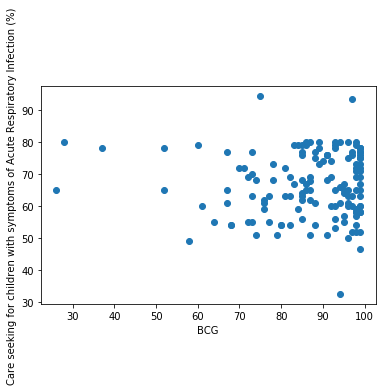

In [95]:
# read the data from the collection 
#The Acute Respiratory Infection(ARI) is inversely proportional. Still there are outliers! 
#When the BCG icreases the ARI will be in moderate mode which is between 45:80

cursor = childHealth.find({}, {'BCG': 1, 'Care seeking for children with symptoms of Acute Respiratory Infection (%)': 1, '_id': 0})
df = pd.DataFrame(list(cursor))

# convert columns to numeric
df['BCG'] = pd.to_numeric(df['BCG'], errors='coerce')
df['Care seeking for children with symptoms of Acute Respiratory Infection (%)'] = pd.to_numeric(df['Care seeking for children with symptoms of Acute Respiratory Infection (%)'], errors='coerce')

# plot a scatter plot of the two columns
plt.scatter(df['BCG'], df['Care seeking for children with symptoms of Acute Respiratory Infection (%)'])
plt.xlabel('BCG')
plt.ylabel('Care seeking for children with symptoms of Acute Respiratory Infection (%)')
plt.show()

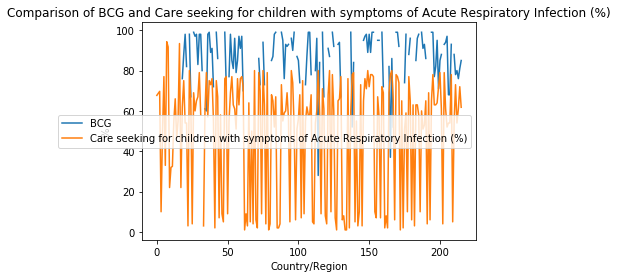

In [96]:
#this graphical representation is line chart,
#it shows clearly the relationship between the ARI and BCG

df['BCG'] = pd.to_numeric(df['BCG'], errors='coerce')
df['Care seeking for children with symptoms of Acute Respiratory Infection (%)'] = pd.to_numeric(df['Care seeking for children with symptoms of Acute Respiratory Infection (%)'], errors='coerce')

# create a line chart
plt.plot(df['BCG'], label='BCG')
plt.plot(df['Care seeking for children with symptoms of Acute Respiratory Infection (%)'], label='Care seeking for children with symptoms of Acute Respiratory Infection (%)')
plt.legend()
plt.xlabel('Country/Region')
plt.ylabel('%')
plt.title('Comparison of BCG and Care seeking for children with symptoms of Acute Respiratory Infection (%)')
plt.show()


In [97]:
Residues=db['Residues'] 
collection = db.get_collection("Residues")


In [98]:
df=pd.read_excel(r'/home/glo36/glgl4thYear/4thSecTerm/BD/FinalProject/Residues.xlsx') 


In [99]:
#converting to dict to count them!

dataInResidues=df.to_dict('records')
Residues.insert_many(dataInResidues) 
print(Residues.count_documents({}))

215


# Using Index to order &sort <span style="color:black"> </span>


In [100]:
Residues.create_index([('CountryID', 1)])

'CountryID_1'

In [101]:
# Get the indexes of the 'student' collection
indexes = Residues.index_information()
print(indexes)

{'_id_': {'v': 2, 'key': [('_id', 1)]}, 'CountryID_1': {'v': 2, 'key': [('CountryID', 1)]}}


In [102]:
#We find that using Indexing We sorted them according to CountryID
#not the main ID in the collection!
#simple indexing(one parameter)

result = Residues.find().hint([('CountryID', 1)])
for doc in result:
    print(doc)

{'_id': 32, 'Residue of BCG gene': 'AGGCCAACCCTA', 'Residue of DTP1 gene': 'AGGCCTCAGTA', 'Residue of DTP3 gene ': 'AGGCCAACCCTA', 'Residue of Polio3 ': 'AGGCCTCAGTA', 'Residue of MCV1': 'AGGCCAACCCTA', 'CountryID': 1}
{'_id': 87, 'Residue of BCG gene': 'AGGCCTCAGTA', 'Residue of DTP1 gene': 'AGGCCCCCAAAA', 'Residue of DTP3 gene ': 'AGGCCTCAGTA', 'Residue of Polio3 ': 'AGGCCCCCAAAA', 'Residue of MCV1': 'AGGCCTCAGTA', 'CountryID': 4}
{'_id': 130, 'Residue of BCG gene': 'AGGCCCCCAAAA', 'Residue of DTP1 gene': 'AGGCCCCCTTTT', 'Residue of DTP3 gene ': 'AGGCCCCCAAAA', 'Residue of Polio3 ': 'AGGCCCCCTTTT', 'Residue of MCV1': 'AGGCCCCCAAAA', 'CountryID': 5}
{'_id': 28, 'Residue of BCG gene': 'AGGCCAACCCTA', 'Residue of DTP1 gene': 'AGGCCTCAGTA', 'Residue of DTP3 gene ': 'AGGCCAACCCTA', 'Residue of Polio3 ': 'AGGCCCCCGGAT', 'Residue of MCV1': 'AGGCCAACCCTA', 'CountryID': 8}
{'_id': 30, 'Residue of BCG gene': 'AGGCCAACCCTA', 'Residue of DTP1 gene': 'AGGCCTCAGTA', 'Residue of DTP3 gene ': 'AGGCC

In [103]:
#compoun indexing
Residues.create_index([('CountryID', 1),('ResBCG', 1)])

'CountryID_1_ResBCG_1'

In [104]:
result = Residues.find().hint([('CountryID', 1),('ResBCG', 1)])
for doc in result:
    print(doc)

{'_id': 32, 'Residue of BCG gene': 'AGGCCAACCCTA', 'Residue of DTP1 gene': 'AGGCCTCAGTA', 'Residue of DTP3 gene ': 'AGGCCAACCCTA', 'Residue of Polio3 ': 'AGGCCTCAGTA', 'Residue of MCV1': 'AGGCCAACCCTA', 'CountryID': 1}
{'_id': 87, 'Residue of BCG gene': 'AGGCCTCAGTA', 'Residue of DTP1 gene': 'AGGCCCCCAAAA', 'Residue of DTP3 gene ': 'AGGCCTCAGTA', 'Residue of Polio3 ': 'AGGCCCCCAAAA', 'Residue of MCV1': 'AGGCCTCAGTA', 'CountryID': 4}
{'_id': 130, 'Residue of BCG gene': 'AGGCCCCCAAAA', 'Residue of DTP1 gene': 'AGGCCCCCTTTT', 'Residue of DTP3 gene ': 'AGGCCCCCAAAA', 'Residue of Polio3 ': 'AGGCCCCCTTTT', 'Residue of MCV1': 'AGGCCCCCAAAA', 'CountryID': 5}
{'_id': 28, 'Residue of BCG gene': 'AGGCCAACCCTA', 'Residue of DTP1 gene': 'AGGCCTCAGTA', 'Residue of DTP3 gene ': 'AGGCCAACCCTA', 'Residue of Polio3 ': 'AGGCCCCCGGAT', 'Residue of MCV1': 'AGGCCAACCCTA', 'CountryID': 8}
{'_id': 30, 'Residue of BCG gene': 'AGGCCAACCCTA', 'Residue of DTP1 gene': 'AGGCCTCAGTA', 'Residue of DTP3 gene ': 'AGGCC

# Using Aggregate Function in different formats <span style="color:black"></span>

In [105]:
pipeline = [
  {
    '$match': {
      '_id': { '$gte': 5, '$lte': 30 }
    }
  },
  {
    '$skip': 4
  },
  {
    '$limit': 26
  },
  {
    '$project': {
      'Residue of BCG gene': 1,
      'Residue of DTP1 gene': 1,
      'Residue of DTP3 gene': 1,
      '_id': 1
    }
  }
]

results = db.Residues.aggregate(pipeline)

for result in results:
    print(result)
    
##Note this is the same like normal syntax!!
#glo




{'_id': 9, 'Residue of BCG gene': 'AGGCTTTTCCTA', 'Residue of DTP1 gene': 'AGGCCAACCCTA'}
{'_id': 10, 'Residue of BCG gene': 'AGGCTTTTCCTA', 'Residue of DTP1 gene': 'AGGCCAACCCTA'}
{'_id': 11, 'Residue of BCG gene': 'AGGCTTTTCCTA', 'Residue of DTP1 gene': 'AGGCCAACCCTA'}
{'_id': 12, 'Residue of BCG gene': 'AGGCTTTTCCTA', 'Residue of DTP1 gene': 'AGGCCAACCCTA'}
{'_id': 13, 'Residue of BCG gene': 'AGGCTTTTCCTA', 'Residue of DTP1 gene': 'AGGCCTCAGTTA'}
{'_id': 14, 'Residue of BCG gene': 'AGGCCAACCCTA', 'Residue of DTP1 gene': 'AGGCCTCAGTA'}
{'_id': 15, 'Residue of BCG gene': 'AGGCCAACCCTA', 'Residue of DTP1 gene': 'AGGCCTCAGTA'}
{'_id': 16, 'Residue of BCG gene': 'AGGCCAACCCTA', 'Residue of DTP1 gene': 'AGGCCTCAGTA'}
{'_id': 17, 'Residue of BCG gene': 'AGGCCAACCCTA', 'Residue of DTP1 gene': 'AGGCCTCAGTA'}
{'_id': 18, 'Residue of BCG gene': 'AGGCCAACCCTA', 'Residue of DTP1 gene': 'AGGCCTCAGTA'}
{'_id': 19, 'Residue of BCG gene': 'AGGCCAACCCTA', 'Residue of DTP1 gene': 'AGGCCTCAGTA'}
{'_id'

In [106]:
result = childHealth.aggregate([
    {"$project": {
        "_id": 1,
        "Care seeking for children with symptoms of Acute Respiratory Infection (%)": 1,
        "Treatment with oral rehydration salts (%)": 1,
        "Care seeking for children with fever (%)": 1
    }},
    
])




In [107]:
#using Aggregate to find the ARI rate in different countries

result = childHealth.aggregate([{"$project": {"Care seeking for children with symptoms of Acute Respiratory Infection (%)": 1}}])

for doc in result:
    print(doc)

{'_id': 1.0, 'Care seeking for children with symptoms of Acute Respiratory Infection (%)': 67.7}
{'_id': 2.0, 'Care seeking for children with symptoms of Acute Respiratory Infection (%)': 68.7}
{'_id': 3.0, 'Care seeking for children with symptoms of Acute Respiratory Infection (%)': 69.7}
{'_id': 4.0, 'Care seeking for children with symptoms of Acute Respiratory Infection (%)': 10.0}
{'_id': 5.0, 'Care seeking for children with symptoms of Acute Respiratory Infection (%)': 49.0}
{'_id': 6.0, 'Care seeking for children with symptoms of Acute Respiratory Infection (%)': 77.0}
{'_id': 7.0, 'Care seeking for children with symptoms of Acute Respiratory Infection (%)': 33.0}
{'_id': 8.0, 'Care seeking for children with symptoms of Acute Respiratory Infection (%)': 94.3}
{'_id': 9.0, 'Care seeking for children with symptoms of Acute Respiratory Infection (%)': 91.7}
{'_id': 10.0, 'Care seeking for children with symptoms of Acute Respiratory Infection (%)': 22.0}
{'_id': 11.0, 'Care seeking f

In [ ]:
#to drop a collection
db['gemographics'].drop() 

In [ ]:
#to drop a database
client.drop_database(db)

In [113]:
from pymongo import MongoClient, HASHED
collection = db['childHealth']

# Using Hashing with index <span style="color:black"> </span>

In [146]:
#If the ids are not in order, make an index which takes value 'hashed 'then order the numbers on Ascending order
childHealth.create_index([("_id", "hashed")])

# find _id values based on CountryID
result = childHealth.find({},'BCG')
for doc in result:
    print(doc)

{'_id': 1.0}
{'_id': 2.0}
{'_id': 3.0}
{'_id': 4.0}
{'_id': 5.0}
{'_id': 6.0}
{'_id': 7.0}
{'_id': 8.0}
{'_id': 9.0}
{'_id': 10.0}
{'_id': 11.0}
{'_id': 12.0}
{'_id': 13.0}
{'_id': 14.0}
{'_id': 15.0}
{'_id': 16.0}
{'_id': 17.0}
{'_id': 18.0}
{'_id': 19.0}
{'_id': 20.0}
{'_id': 21.0}
{'_id': 22.0}
{'_id': 23.0}
{'_id': 24.0}
{'_id': 25.0}
{'_id': 26.0}
{'_id': 27.0}
{'_id': 28.0}
{'_id': 29.0}
{'_id': 30.0}
{'_id': 31.0}
{'_id': 32.0}
{'_id': 33.0}
{'_id': 34.0}
{'_id': 35.0}
{'_id': 36.0}
{'_id': 37.0}
{'_id': 38.0}
{'_id': 39.0}
{'_id': 40.0}
{'_id': 41.0}
{'_id': 42.0}
{'_id': 43.0}
{'_id': 44.0}
{'_id': 45.0}
{'_id': 46.0}
{'_id': 47.0}
{'_id': 48.0}
{'_id': 49.0}
{'_id': 50.0}
{'_id': 51.0}
{'_id': 52.0}
{'_id': 53.0}
{'_id': 54.0}
{'_id': 55.0}
{'_id': 56.0}
{'_id': 57.0}
{'_id': 58.0}
{'_id': 59.0}
{'_id': 60.0}
{'_id': 61.0}
{'_id': 62.0}
{'_id': 63.0}
{'_id': 64.0}
{'_id': 65.0}
{'_id': 66.0}
{'_id': 67.0}
{'_id': 68.0}
{'_id': 69.0}
{'_id': 70.0}
{'_id': 71.0}
{'_id': 72.0}
{